In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

C:\Users\Vasu\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.chdir("D:\great lakes\projects\capstone")

In [3]:
df_screening=pd.read_excel("D:\great lakes\projects\capstone\disease_pred - Copy.xlsx",sheet_name="Screening")
df_follow_up=pd.read_excel("D:\great lakes\projects\capstone\disease_pred - Copy.xlsx",sheet_name="Follow_ups")
df_screening["freq"]=0
for i in np.arange(9998):
    df_screening["freq"].loc[i]=df_follow_up[df_follow_up["Patient_ID"] == df_screening["Patient_ID"][i]].shape[0]

C:\Users\Vasu\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [4]:
df_screening.head()

,Date,Patient_ID,screen_no,Age,Gender,City,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,...,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
0,2015-05-14,12-1101,1,39,F,Hyderabad,0.0,0.0,0.0,0.0,...,N,N,0.0,0.0,N,N,0,19.25,Healthy,0
1,2015-05-14,12-1102,1,34,F,Hyderabad,0.0,0.0,0.0,0.0,...,N,N,0.0,0.0,N,N,0,18.86,Healthy,0
2,2015-05-14,12-1103,1,74,F,Hyderabad,0.0,0.0,0.0,0.0,...,N,N,0.0,0.0,N,N,0,18.83,DB,0
3,2015-05-14,12-1105,1,39,F,Hyderabad,0.0,0.0,0.0,0.0,...,N,N,1.0,0.0,N,N,0,19.91,Healthy,0
4,2015-05-15,12-1106,1,34,F,Hyderabad,0.0,0.0,0.0,0.0,...,N,N,0.0,0.0,N,N,0,21.57,Healthy,0


In [5]:
df_screening["Date"].dt.year.value_counts()

2016    6913
2017    1972
2018     571
2015     358
2019     186
Name: Date, dtype: int64

In [6]:
df_screening.columns

Index(['Date', 'Patient_ID', 'screen_no', 'Age', 'Gender', 'City',
       'Medication_DB', 'Medication_HTN', 'Medication_Thyroid',
       'Medication_Dyslipidemia', 'other_diseases', 'Mediaction_otherdisease',
       'Is_thyroid', 'Is_Dyslipidemia', 'is_hypertension',
       'Hypertension_family', 'BP_riskscore', 'Is_diabetic', 'DB_family',
       'DB_category', 'OB_category', 'Heart_attack', 'Smoking', 'Alcohol',
       'BMI', 'Disease', 'freq'],
      dtype='object')

In [7]:
 df_screening.drop(["screen_no","City"],axis=1,inplace=True)  #Since all the patients are from the same city 

In [8]:
df_screening.shape

(10000, 25)

In [9]:
df_screening.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     10000 non-null  datetime64[ns]
 1   Patient_ID               10000 non-null  object        
 2   Age                      10000 non-null  int64         
 3   Gender                   10000 non-null  object        
 4   Medication_DB            9640 non-null   float64       
 5   Medication_HTN           9698 non-null   float64       
 6   Medication_Thyroid       9627 non-null   float64       
 7   Medication_Dyslipidemia  9610 non-null   float64       
 8   other_diseases           8 non-null      object        
 9   Mediaction_otherdisease  9616 non-null   float64       
 10  Is_thyroid               9958 non-null   float64       
 11  Is_Dyslipidemia          9958 non-null   float64       
 12  is_hypertension          10000 no

In [10]:
df_screening.isnull().sum()

Date                          0
Patient_ID                    0
Age                           0
Gender                        0
Medication_DB               360
Medication_HTN              302
Medication_Thyroid          373
Medication_Dyslipidemia     390
other_diseases             9992
Mediaction_otherdisease     384
Is_thyroid                   42
Is_Dyslipidemia              42
is_hypertension               0
Hypertension_family           0
BP_riskscore                  1
Is_diabetic                   0
DB_family                     0
DB_category                  24
OB_category                   1
Heart_attack                  0
Smoking                       0
Alcohol                       0
BMI                           1
Disease                      15
freq                          0
dtype: int64

In [11]:
missing_values =pd.DataFrame(100*df_screening.isnull().sum()/len(df_screening),columns=["percentage of missing values"]).sort_values(ascending=False,by
                                                                                                       ="percentage of missing values")
missing_values

,percentage of missing values
other_diseases,99.92
Medication_Dyslipidemia,3.90
Mediaction_otherdisease,3.84
Medication_Thyroid,3.73
Medication_DB,3.60
Medication_HTN,3.02
Is_Dyslipidemia,0.42
Is_thyroid,0.42
DB_category,0.24
Disease,0.15


In [12]:
df_screening["Patient_ID"].value_counts()  #Duplicate columns are present

NHIN07111900070001    2
NHIN22021700047001    2
D2D-40857             1
D2D-38353             1
NHIN23091700036009    1
                     ..
NHIN13081600020002    1
D2D-44016             1
D2D-21322             1
D2D-32391             1
NHIN20041700061010    1
Name: Patient_ID, Length: 9998, dtype: int64

In [13]:
df_screening[df_screening["Patient_ID"] == 'NHIN07111900070001']

,Date,Patient_ID,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,other_diseases,Mediaction_otherdisease,...,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
4496,2019-11-07,NHIN07111900070001,67,F,0.0,1.0,0.0,NaN,Breast Cancer,1.0,...,Y,N,1.0,2.0,N,N,0,26.2,Diabetes-Hypertension-Obesity-ThyroidDisorder,0
4497,2019-11-07,NHIN07111900070001,67,F,0.0,1.0,0.0,NaN,Breast Cancer,1.0,...,Y,N,NaN,NaN,N,N,0,NaN,-,0


In [14]:
df_screening.drop(4497,axis=0,inplace=True)    

In [15]:
df_screening[df_screening["Patient_ID"] == 'NHIN22021700047001'] 

,Date,Patient_ID,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,other_diseases,Mediaction_otherdisease,...,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
8802,2016-08-29,NHIN22021700047001,38,M,0.0,0.0,0.0,0.0,NaN,0.0,...,N,N,0.0,0.0,N,N,0,20.88,Healthy,2
8803,2017-02-22,NHIN22021700047001,38,M,0.0,0.0,0.0,0.0,NaN,0.0,...,N,N,0.0,0.0,N,N,0,21.13,Healthy,2


In [16]:
df_screening.drop(8803,axis=0,inplace=True)    #considering 2016 details of the patient

In [17]:
patient_id=df_screening["Patient_ID"]

In [18]:
cols=['Gender','Medication_DB', 'Medication_HTN', 'Medication_Thyroid','Medication_Dyslipidemia', 'other_diseases', 'Mediaction_otherdisease','Is_thyroid', 'Is_Dyslipidemia', 'is_hypertension', 'Hypertension_family', 'BP_riskscore', 'Is_diabetic', 'DB_family', 'DB_category', 'OB_category', 'Heart_attack', 'Smoking', 'Alcohol']
for i in cols:
    print(df_screening[i].value_counts())
    print("-"*50)

M    4999
F    4999
Name: Gender, dtype: int64
--------------------------------------------------
0.0    8266
1.0    1372
Name: Medication_DB, dtype: int64
--------------------------------------------------
0.0    7743
1.0    1953
Name: Medication_HTN, dtype: int64
--------------------------------------------------
0.0    9609
1.0      16
Name: Medication_Thyroid, dtype: int64
--------------------------------------------------
0.0    9608
1.0       1
Name: Medication_Dyslipidemia, dtype: int64
--------------------------------------------------
Synasitis                  1
Asthma and dust allergy    1
Breast Cancer              1
gastric problem            1
sinusitis                  1
Hyper acidity              1
Acute pancreatitis         1
Name: other_diseases, dtype: int64
--------------------------------------------------
0.0    9612
1.0       2
Name: Mediaction_otherdisease, dtype: int64
--------------------------------------------------
0.0    9938
1.0      18
Name: Is_thyroid, 

In [19]:
df_screening.drop(["Patient_ID"],axis=1,inplace=True)  #Other disease more than 99% of the column is empty
#"other_diseases"

In [20]:
categorical_variables=df_screening.select_dtypes(include='object').columns
print(categorical_variables)

Index(['Gender', 'other_diseases', 'is_hypertension', 'Hypertension_family',
       'Is_diabetic', 'DB_family', 'Heart_attack', 'Smoking', 'Disease'],
      dtype='object')


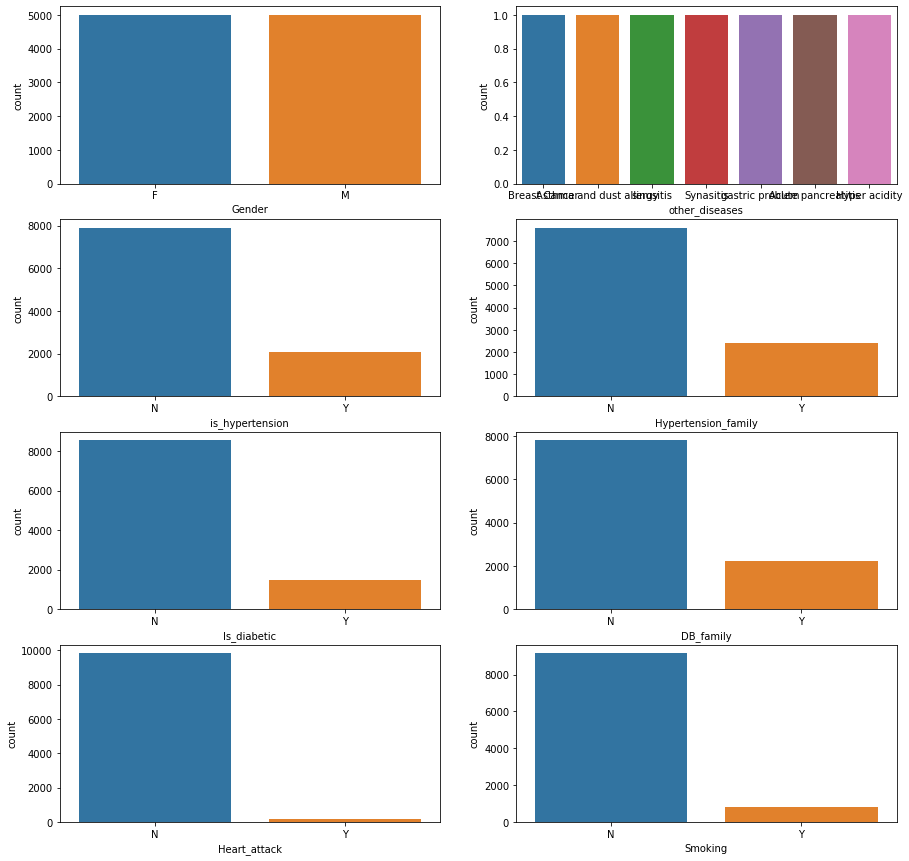

In [21]:
fig,axes=plt.subplots(4,2,figsize=(15,15))
for idx in range(len(categorical_variables)-1):
    row,col=idx//2,idx%2
    sns.countplot(data=df_screening,x=categorical_variables[idx],ax=axes[row,col])  

In [22]:
df_screening["Gender"].replace({"M":0,"F":1},inplace=True)
df_screening["Smoking"].replace({"N":0,"Y":1},inplace=True)
df_screening["Heart_attack"].replace({"N":0,"Y":1},inplace=True)
df_screening["DB_family"].replace({"N":0,"Y":1},inplace=True)
df_screening["Is_diabetic"].replace({"N":0,"Y":1},inplace=True)
df_screening["Hypertension_family"].replace({"N":0,"Y":1},inplace=True)
df_screening["is_hypertension"].replace({"N":0,"Y":1},inplace=True)

In [23]:
df_screening["Disease"].value_counts()

Healthy                                          4671
HTN                                              2005
DB-HTN                                           1302
OB                                                520
DB                                                485
HTN-OB                                            367
DB-HTN-OB                                         263
Obesity                                            93
DB-OB                                              83
Hypertension                                       56
Hypertension-Obesity                               46
Diabetes-Hypertension                              20
Diabetes-Hypertension-Obesity                      19
Diabetes-Obesity                                   13
Diabetes                                           13
Healthy-HTN                                         9
ThyroidDisorder                                     6
Obesity-ThyroidDisorder                             4
Diabetes-Hypertension-Obesit

In [24]:
df_screening['Disease'] = df_screening['Disease'].replace('-', '')
df_screening["Disease"] = df_screening["Disease"].replace('Healthy',0)

idx=df_screening[(df_screening["Disease"] != 0) & (df_screening["Disease"].notnull())].index
df_screening["Disease"].loc[idx] = 1
df_screening["Disease"]=pd.to_numeric(df_screening["Disease"],errors='coerce')

C:\Users\Vasu\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [25]:
df_screening["Disease"].value_counts()

1.0    5312
0.0    4671
Name: Disease, dtype: int64

In [26]:
df_date=df_screening["Date"]
df_screening.drop("Date",axis=1,inplace=True)

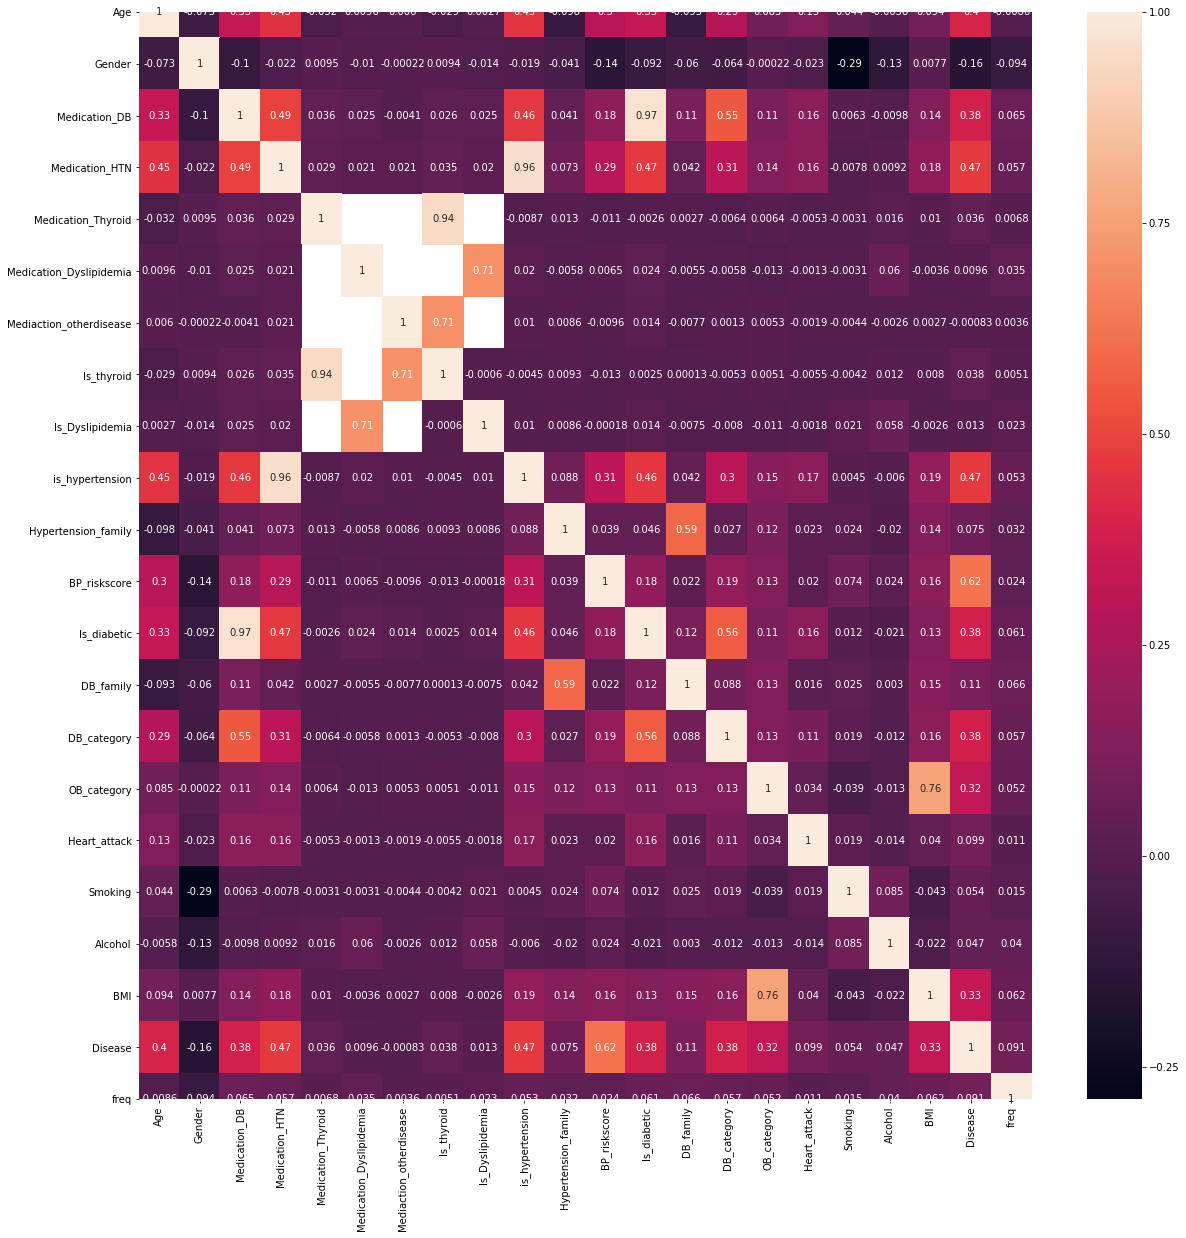

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(df_screening.corr(),annot=True);

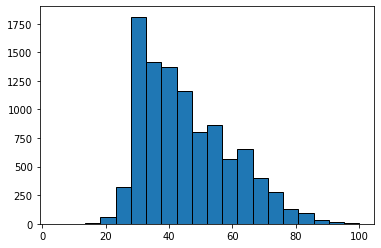

In [28]:
plt.hist(df_screening["Age"],bins=20,edgecolor='black');

In [29]:
df_screening.isnull().sum()

Age                           0
Gender                        0
Medication_DB               360
Medication_HTN              302
Medication_Thyroid          373
Medication_Dyslipidemia     389
other_diseases             9991
Mediaction_otherdisease     384
Is_thyroid                   42
Is_Dyslipidemia              42
is_hypertension               0
Hypertension_family           0
BP_riskscore                  0
Is_diabetic                   0
DB_family                     0
DB_category                  23
OB_category                   0
Heart_attack                  0
Smoking                       0
Alcohol                       0
BMI                           0
Disease                      15
freq                          0
dtype: int64

## EDA

## Disease based

### Diabetic

In [30]:
1454/9998*100 #14% of the overall are diabetic

14.542908581716343

In [31]:
df_screening[df_screening["Is_diabetic"] == 1].describe()

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,...,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
count,1454.000000,1454.000000,1450.000000,1436.000000,1422.000000,1420.000000,1420.000000,1452.000000,1452.000000,1454.000000,...,1454.0,1454.000000,1451.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1449.000000,1454.000000
mean,56.825997,0.387895,0.946207,0.651114,0.001406,0.000704,0.000704,0.002066,0.000689,0.662999,...,1.0,0.339752,1.456926,1.414718,0.066025,0.090784,0.051582,26.314601,0.995169,0.780605
std,12.432307,0.487438,0.225687,0.476784,0.037490,0.026537,0.026537,0.045423,0.026243,0.472848,...,0.0,0.473788,0.962059,0.902289,0.248411,0.287401,0.291106,5.229775,0.069361,2.919075
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,22.750000,1.000000,0.000000
50%,56.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,25.975000,1.000000,0.000000
75%,65.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.0,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,29.272500,1.000000,0.000000
max,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.000000,3.000000,3.000000,1.000000,1.000000,4.000000,51.320000,1.000000,35.000000


In [32]:
print(df_screening[df_screening["Is_diabetic"] == 1].groupby("Gender")["Gender"].count())

Gender
0    890
1    564
Name: Gender, dtype: int64


In [33]:
print(df_screening[df_screening["Is_diabetic"] == 1].groupby(["Medication_DB"])["Medication_DB"].count())
print(1372/1454*100)

Medication_DB
0.0      78
1.0    1372
Name: Medication_DB, dtype: int64
94.36038514442916


In [34]:
df_screening[(df_screening["Is_diabetic"] == 1) & (df_screening["Medication_DB"] == 0)].describe()

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,...,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
count,78.000000,78.000000,78.0,78.000000,78.0,77.0,78.000000,78.000000,78.0,78.000000,...,78.0,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,51.500000,0.423077,0.0,0.012821,0.0,0.0,0.012821,0.012821,0.0,0.384615,...,1.0,0.384615,1.294872,1.410256,0.051282,0.153846,0.038462,25.041154,0.910256,0.410256
std,13.109677,0.497245,0.0,0.113228,0.0,0.0,0.113228,0.113228,0.0,0.489653,...,0.0,0.489653,1.033327,0.763381,0.222000,0.363137,0.193552,5.121881,0.287664,1.252902
min,29.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,23.122500,1.000000,0.000000
50%,49.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,1.0,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,25.120000,1.000000,0.000000
75%,57.000000,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,...,1.0,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,28.025000,1.000000,0.000000
max,94.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000,0.0,1.000000,...,1.0,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,36.930000,1.000000,7.000000


In [35]:
df_screening[(df_screening["Is_diabetic"] == 1) & (df_screening["Medication_DB"] == 0)]["OB_category"].value_counts()

2.0    39
1.0    26
0.0    11
3.0     2
Name: OB_category, dtype: int64

In [36]:
df_screening[(df_screening["Is_diabetic"] == 0) & (df_screening["Medication_DB"] == 1)]

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,other_diseases,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,...,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq


In [37]:
df_screening[df_screening["DB_category"] == 0].describe()

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,...,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
count,7101.000000,7101.000000,6815.000000,6864.000000,6821.000000,6809.000000,6812.000000,7071.000000,7071.000000,7101.000000,...,7101.000000,7101.000000,7101.0,7101.000000,7101.000000,7101.000000,7101.000000,7101.000000,7092.000000,7101.000000
mean,42.679623,0.519927,0.041379,0.129953,0.001906,0.000147,0.000147,0.001980,0.000283,0.138150,...,0.042952,0.200676,0.0,1.090973,0.008590,0.078862,0.070553,24.037450,0.422166,0.384171
std,13.489799,0.499638,0.199181,0.336277,0.043618,0.012119,0.012116,0.044455,0.016817,0.345081,...,0.202763,0.400534,0.0,0.888838,0.092292,0.269542,0.349980,5.076256,0.493940,2.019273
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,20.560000,0.000000,0.000000
50%,39.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,23.690000,0.000000,0.000000
75%,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,2.000000,0.000000,0.000000,0.000000,26.980000,1.000000,0.000000
max,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,3.000000,1.000000,1.000000,8.000000,68.050000,1.000000,34.000000


In [38]:
df_screening[df_screening["DB_category"] == 1].describe()

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,...,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
count,1714.000000,1714.000000,1657.000000,1667.000000,1651.000000,1649.0,1651.000000,1705.000000,1705.0,1714.000000,...,1714.000000,1714.00000,1714.0,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1708.000000,1714.000000
mean,49.990665,0.480747,0.206397,0.289142,0.000606,0.0,0.000606,0.001173,0.0,0.296383,...,0.212369,0.23979,1.0,1.327305,0.022754,0.092765,0.071762,25.662561,0.670375,0.506418
std,14.446670,0.499775,0.404841,0.453500,0.024611,0.0,0.024611,0.034239,0.0,0.456795,...,0.409104,0.42708,0.0,0.892788,0.149161,0.290188,0.386713,5.653831,0.470215,2.389219
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.00000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.00000,1.0,1.000000,0.000000,0.000000,0.000000,22.065000,0.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.00000,1.0,2.000000,0.000000,0.000000,0.000000,25.125000,1.000000,0.000000
75%,61.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,...,0.000000,0.00000,1.0,2.000000,0.000000,0.000000,0.000000,28.747500,1.000000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,...,1.000000,1.00000,1.0,3.000000,1.000000,1.000000,8.000000,74.300000,1.000000,32.000000


In [39]:
df_screening[(df_screening["DB_category"] == 0) |(df_screening["DB_category"] == 1)].describe()

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,...,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
count,8815.000000,8815.000000,8472.000000,8531.000000,8472.000000,8458.000000,8463.000000,8776.000000,8776.000000,8815.000000,...,8815.000000,8815.000000,8815.000000,8815.000000,8815.000000,8815.000000,8815.000000,8815.000000,8800.000000,8815.000000
mean,44.101191,0.512309,0.073654,0.161060,0.001653,0.000118,0.000236,0.001823,0.000228,0.168917,...,0.075893,0.208281,0.194441,1.136926,0.011344,0.081566,0.070788,24.353438,0.470341,0.407941
std,13.982938,0.499877,0.261223,0.367608,0.040620,0.010873,0.015372,0.042662,0.015095,0.374700,...,0.264842,0.406102,0.395792,0.894461,0.105910,0.273717,0.357396,5.232938,0.499148,2.096737
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.815000,0.000000,0.000000
50%,41.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,23.940000,0.000000,0.000000
75%,52.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,27.350000,1.000000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,8.000000,74.300000,1.000000,34.000000


In [40]:
df_screening[(df_screening["DB_category"] == 3) |(df_screening["DB_category"] == 2)].describe()

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,...,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
count,1160.000000,1160.000000,1143.000000,1142.000000,1130.000000,1128.0,1128.0,1157.000000,1157.0,1160.000000,...,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.0,1160.000000
mean,54.268966,0.414655,0.651794,0.504378,0.001770,0.0,0.0,0.001729,0.0,0.514655,...,0.674138,0.312069,2.200862,1.426724,0.050862,0.093966,0.058621,26.400509,1.0,0.793103
std,12.833845,0.492875,0.476610,0.500200,0.042052,0.0,0.0,0.041559,0.0,0.500001,...,0.468898,0.463538,0.400818,0.896629,0.219811,0.291907,0.332343,5.388094,0.0,3.050389
min,22.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.570000,1.0,0.000000
25%,44.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,22.850000,1.0,0.000000
50%,54.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,...,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,26.020000,1.0,0.000000
75%,64.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,...,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,29.232500,1.0,0.000000
max,99.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,...,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,4.000000,75.350000,1.0,36.000000


In [41]:
df_screening[(df_screening["DB_category"] == 3) |(df_screening["DB_category"] == 2)& (df_screening["BMI"] >= 23)]["BMI"].count()

935

In [42]:
935/1160

0.8060344827586207

In [43]:
df_screening.groupby(["DB_category","DB_family","Is_diabetic"])["Is_diabetic","Medication_DB","Medication_HTN","is_hypertension","Disease"].count()

C:\Users\Vasu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Is_diabetic  Medication_DB  Medication_HTN  \
DB_category DB_family Is_diabetic                                               
0.0         0         0                   5470           5229            5275   
                      1                    206            205             203   
            1         0                   1326           1282            1288   
                      1                     99             99              98   
1.0         0         0                   1052           1007            1018   
                      1                    251            251             248   
            1         0                    298            286             289   
                      1                    113            113             112   
2.0         0         0                    261            251             256   
                      1                    385            383             379   
            1         0                     70             67              68   
                      1                    211            211             209   
3.0         0         0                     37             36              36   
                      1                    115            114             113   
            1         0                     10             10              10   
                      1                     71             71              71   

                                   is_hypertension  Disease  
DB_category DB_family Is_diabetic                            
0.0         0         0                       5470     5463  
                      1                        206      204  
            1         0                       1326     1326  
                      1                         99       99  
1.0         0         0                       1052     1049  
                      1                        251      249  
            1         0                        298      298  
                      1                        113      112  
2.0         0         0                        261      261  
                      1                        385      385  
            1         0                         70       70  
                      1                        211      211  
3.0         0         0                         37       37  
                      1                        115      115  
            1         0                         10       10  
                      1                         71       71

### Thyroid

In [44]:
18/9998*100

0.18003600720144028

In [45]:
df_screening[df_screening["Is_thyroid"] == 1].describe()

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,...,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
count,18.000000,18.000000,3.000000,3.0,18.000000,0.0,1.0,18.0,18.0,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.0,18.000000,18.000000,18.000000,16.0,18.000000
mean,35.722222,0.611111,0.666667,1.0,0.888889,NaN,1.0,1.0,0.0,0.166667,...,0.166667,0.222222,0.333333,1.277778,0.0,0.055556,0.166667,25.580000,1.0,0.722222
std,12.559531,0.501631,0.577350,0.0,0.323381,NaN,NaN,0.0,0.0,0.383482,...,0.383482,0.427793,0.685994,0.958280,0.0,0.235702,0.383482,5.349108,0.0,2.164026
min,19.000000,0.000000,0.000000,1.0,0.000000,NaN,1.0,1.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,15.600000,1.0,0.000000
25%,25.500000,0.000000,0.500000,1.0,1.000000,NaN,1.0,1.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.250000,0.0,0.000000,0.000000,22.625000,1.0,0.000000
50%,34.500000,1.000000,1.000000,1.0,1.000000,NaN,1.0,1.0,0.0,0.000000,...,0.000000,0.000000,0.000000,1.500000,0.0,0.000000,0.000000,25.160000,1.0,0.000000
75%,44.500000,1.000000,1.000000,1.0,1.000000,NaN,1.0,1.0,0.0,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.0,0.000000,0.000000,28.382500,1.0,0.000000
max,67.000000,1.000000,1.000000,1.0,1.000000,NaN,1.0,1.0,0.0,1.000000,...,1.000000,1.000000,2.000000,3.000000,0.0,1.000000,1.000000,35.100000,1.0,9.000000


In [46]:
df_screening[df_screening["Is_thyroid"] == 1]["Gender"].value_counts() 

1    11
0     7
Name: Gender, dtype: int64

In [47]:
print(df_screening[df_screening["Is_thyroid"] == 1].groupby(["Medication_Thyroid","Gender"])["Medication_Thyroid"].count())

Medication_Thyroid  Gender
0.0                 0          1
                    1          1
1.0                 0          6
                    1         10
Name: Medication_Thyroid, dtype: int64


In [48]:
df_screening[(df_screening["Is_thyroid"] == 1) & (df_screening["Medication_Thyroid"] == 0)].describe()

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,...,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
count,2.000000,2.000000,1.0,1.0,2.0,0.0,1.0,2.0,2.0,2.000000,...,2.000000,2.0,2.000000,2.000000,2.0,2.0,2.0,2.000000,2.0,2.0
mean,45.500000,0.500000,0.0,1.0,0.0,NaN,1.0,1.0,0.0,0.500000,...,0.500000,0.0,0.500000,1.000000,0.0,0.0,0.0,22.700000,1.0,0.0
std,30.405592,0.707107,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.707107,...,0.707107,0.0,0.707107,1.414214,0.0,0.0,0.0,4.949747,0.0,0.0
min,24.000000,0.000000,0.0,1.0,0.0,NaN,1.0,1.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,19.200000,1.0,0.0
25%,34.750000,0.250000,0.0,1.0,0.0,NaN,1.0,1.0,0.0,0.250000,...,0.250000,0.0,0.250000,0.500000,0.0,0.0,0.0,20.950000,1.0,0.0
50%,45.500000,0.500000,0.0,1.0,0.0,NaN,1.0,1.0,0.0,0.500000,...,0.500000,0.0,0.500000,1.000000,0.0,0.0,0.0,22.700000,1.0,0.0
75%,56.250000,0.750000,0.0,1.0,0.0,NaN,1.0,1.0,0.0,0.750000,...,0.750000,0.0,0.750000,1.500000,0.0,0.0,0.0,24.450000,1.0,0.0
max,67.000000,1.000000,0.0,1.0,0.0,NaN,1.0,1.0,0.0,1.000000,...,1.000000,0.0,1.000000,2.000000,0.0,0.0,0.0,26.200000,1.0,0.0


### Hypertension

In [49]:
2089/9998*100

20.894178835767153

In [50]:
df_screening[df_screening["is_hypertension"] == 1][cols].describe()

,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,Hypertension_family,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol
count,2089.00000,2050.000000,2087.000000,2040.000000,2038.000000,2038.000000,2086.000000,2086.000000,2089.0,2089.000000,2089.000000,2089.000000,2089.000000,2086.000000,2089.000000,2089.000000,2089.000000,2089.000000
mean,0.48157,0.453659,0.935793,0.000980,0.000491,0.000491,0.001438,0.000479,1.0,0.312111,0.966012,0.461465,0.254667,0.873921,1.434658,0.056965,0.085208,0.065103
std,0.49978,0.497969,0.245180,0.031304,0.022151,0.022151,0.037905,0.021895,0.0,0.463466,0.858970,0.498632,0.435778,0.956573,0.907433,0.231831,0.279258,0.359028
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000
75%,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,5.000000


In [51]:
print(df_screening[df_screening["is_hypertension"] == 1].groupby("Gender")["Gender"].count())

Gender
0    1083
1    1006
Name: Gender, dtype: int64


In [52]:
print(df_screening[df_screening["is_hypertension"] == 1].groupby(["Medication_HTN"])["Medication_HTN"].count())
print(1953/2089*100)

Medication_HTN
0.0     134
1.0    1953
Name: Medication_HTN, dtype: int64
93.48970799425562


In [53]:
df_screening[(df_screening["is_hypertension"] == 1) & (df_screening["Medication_HTN"] == 0)].describe()

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,...,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
count,134.000000,134.000000,133.0,134.0,133.0,133.0,133.0,134.0,134.0,134.0,...,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,51.149254,0.440299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.216418,0.216418,0.529851,1.507463,0.044776,0.164179,0.022388,26.175373,0.828358,0.470149
std,13.073251,0.498286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.413348,0.413348,0.837920,0.829406,0.207588,0.371828,0.192585,5.638025,0.378484,2.674554
min,28.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,23.160000,1.000000,0.000000
50%,50.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,25.885000,1.000000,0.000000
75%,62.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,28.727500,1.000000,0.000000
max,90.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,2.000000,45.190000,1.000000,25.000000


In [54]:
df_screening[(df_screening["is_hypertension"] == 0) & (df_screening["Medication_HTN"] == 1)]

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,other_diseases,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,...,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq


### Dysilipedemia

In [55]:
pd.set_option("display.max_columns",22)
df_screening[df_screening["Is_Dyslipidemia"] == 1]

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,other_diseases,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,...,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
7190,59,0,1.0,1.0,NaN,1.0,NaN,NaN,0.0,1.0,1,...,1.0,1,0,0.0,0.0,0,0,2,22.75,1.0,8
7512,37,0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,1.0,0,...,0.0,0,0,0.0,1.0,0,1,1,24.50,1.0,0


### Obesity

In [56]:
df_screening.groupby(["OB_category"])[["Age","BMI"]].describe()

Age                                                       \
              count       mean        std   min   25%   50%   75%    max   
OB_category                                                                
0.0          2985.0  44.130988  15.089121  18.0  31.0  40.0  54.0   99.0   
1.0          2682.0  44.192767  14.889289  16.0  32.0  40.0  54.0  100.0   
2.0          3979.0  46.614979  13.026698   4.0  36.0  44.0  54.0   99.0   
3.0           352.0  48.335227  12.801180  27.0  39.0  47.0  57.0   94.0   

                BMI                                                       \
              count       mean       std    min      25%     50%     75%   
OB_category                                                                
0.0          2985.0  20.894285  1.377861  12.92  19.8800  21.010  22.020   
1.0          2682.0  21.181779  3.883338   0.00  17.6000  23.400  24.190   
2.0          3979.0  28.394443  2.484911  25.00  26.3400  27.850  30.045   
3.0           352.0  38.759318  5.115791  35.00  35.8175  37.155  39.555   

                    
               max  
OB_category         
0.0          27.64  
1.0          25.00  
2.0          34.99  
3.0          75.35

In [57]:
df_screening[df_screening["OB_category"] == 3].describe()

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,Hypertension_family,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
count,352.000000,352.000000,343.000000,344.000000,342.000000,341.0,341.0,352.000000,352.0,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.0,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,48.335227,0.636364,0.253644,0.409884,0.002924,0.0,0.0,0.002841,0.0,0.423295,0.352273,0.752841,0.255682,0.321023,0.727273,3.0,0.036932,0.045455,0.039773,38.759318,0.815341,0.525568
std,12.801180,0.481730,0.435732,0.492528,0.054074,0.0,0.0,0.053300,0.0,0.494785,0.478358,0.849832,0.436865,0.467534,0.905536,0.0,0.188863,0.208595,0.222925,5.115791,0.388573,2.355674
min,27.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,0.000000,0.000000,0.000000,35.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,0.000000,0.000000,0.000000,35.817500,1.000000,0.000000
50%,47.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,0.000000,0.000000,0.000000,37.155000,1.000000,0.000000
75%,57.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.0,0.000000,0.000000,0.000000,39.555000,1.000000,0.000000
max,94.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.0,1.000000,1.000000,2.000000,75.350000,1.000000,32.000000


In [58]:
df_screening[(df_screening["OB_category"] == 3) | (df_screening["OB_category"] == 2) & (df_screening["is_hypertension"] == 1)].describe()

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,Hypertension_family,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
count,1416.000000,1416.000000,1392.000000,1407.000000,1390.000000,1387.0,1388.000000,1415.000000,1415.0,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1414.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1412.000000,1416.000000
mean,54.519774,0.519774,0.416667,0.803838,0.001439,0.0,0.000720,0.002120,0.0,0.856638,0.350282,0.919492,0.423729,0.297316,0.859264,2.248588,0.053672,0.066384,0.052966,31.255085,0.946884,0.683616
std,12.529300,0.499785,0.493184,0.397234,0.037919,0.0,0.026841,0.046012,0.0,0.350565,0.477227,0.866667,0.494323,0.457238,0.937915,0.432347,0.225450,0.249040,0.317930,5.492204,0.224345,2.750427
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000
25%,45.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,27.097500,1.000000,0.000000
50%,54.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,29.860000,1.000000,0.000000
75%,64.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,34.890000,1.000000,0.000000
max,94.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,5.000000,75.350000,1.000000,32.000000


In [59]:
df_screening[(df_screening["OB_category"] == 3) | (df_screening["OB_category"] == 2)].describe()

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,Hypertension_family,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
count,4331.000000,4331.000000,4192.000000,4217.000000,4190.000000,4181.0,4184.000000,4314.000000,4314.0,4331.000000,4331.000000,4331.00000,4331.000000,4331.000000,4327.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4327.000000,4331.000000
mean,46.754791,0.496190,0.189647,0.268200,0.001909,0.0,0.000239,0.002086,0.0,0.280074,0.296698,0.63311,0.193489,0.284692,0.540328,2.081275,0.021011,0.071808,0.064650,29.236844,0.732840,0.581852
std,13.015549,0.500043,0.392068,0.443075,0.043659,0.0,0.015460,0.045633,0.0,0.449087,0.456855,0.81697,0.395078,0.451320,0.819423,0.273288,0.143438,0.258199,0.336363,3.977174,0.442528,2.548093
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,26.490000,0.000000,0.000000
50%,44.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,28.220000,1.000000,0.000000
75%,55.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,1.000000,1.00000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,30.740000,1.000000,0.000000
max,99.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,2.00000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,5.000000,75.350000,1.000000,34.000000


In [60]:
df_screening[(df_screening["OB_category"] == 3)]["is_hypertension"].value_counts()

0    203
1    149
Name: is_hypertension, dtype: int64

## Age analysis

In [61]:
df_screening.loc[80]  #age 4

Age                            4
Gender                         1
Medication_DB                  0
Medication_HTN                 0
Medication_Thyroid             0
Medication_Dyslipidemia        0
other_diseases               NaN
Mediaction_otherdisease        0
Is_thyroid                     0
Is_Dyslipidemia                0
is_hypertension                0
Hypertension_family            0
BP_riskscore                   1
Is_diabetic                    0
DB_family                      0
DB_category                    0
OB_category                    2
Heart_attack                   0
Smoking                        0
Alcohol                        0
BMI                        27.65
Disease                        1
freq                           0
Name: 80, dtype: object

In [62]:
df_screening[(df_screening["Age"] < 20) & (df_screening["Disease"] == 1)][['Age','Gender','Medication_DB','Medication_HTN','Medication_Thyroid','Medication_Dyslipidemia','Mediaction_otherdisease','DB_family','DB_category','OB_category','Heart_attack','Smoking','Alcohol','BMI']]

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI
80,4,1,0.0,0.0,0.0,0.0,0.0,0,0.0,2.0,0,0,0,27.65
3725,19,1,NaN,NaN,1.0,NaN,NaN,0,0.0,1.0,0,0,1,15.60


In [63]:
df_screening.loc[3725]  #age 19 F

Age                          19
Gender                        1
Medication_DB               NaN
Medication_HTN              NaN
Medication_Thyroid            1
Medication_Dyslipidemia     NaN
other_diseases              NaN
Mediaction_otherdisease     NaN
Is_thyroid                    1
Is_Dyslipidemia               0
is_hypertension               0
Hypertension_family           0
BP_riskscore                  0
Is_diabetic                   0
DB_family                     0
DB_category                   0
OB_category                   1
Heart_attack                  0
Smoking                       0
Alcohol                       1
BMI                        15.6
Disease                       1
freq                          0
Name: 3725, dtype: object

In [64]:
df_screening[(df_screening["Age"] > 75) & (df_screening["Disease"] == 1) & (df_screening["Gender"] == 0)][cols].describe()
#[['Age','Gender','Medication_DB','Medication_HTN','Medication_Thyroid','Medication_Dyslipidemia','Mediaction_otherdisease','DB_family','DB_category','OB_category','Heart_attack','Smoking','Alcohol','BMI']].describe()

,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,Hypertension_family,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol
count,127.0,125.000000,127.000000,125.0,125.0,125.0,127.0,127.0,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,0.0,0.464000,0.637795,0.0,0.0,0.0,0.0,0.0,0.653543,0.094488,0.968504,0.480315,0.110236,0.850394,0.960630,0.086614,0.133858,0.165354
std,0.0,0.500709,0.482541,0.0,0.0,0.0,0.0,0.0,0.477725,0.293665,0.825554,0.501591,0.314424,0.891572,0.800809,0.282383,0.341848,0.587756
min,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,2.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000
max,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,4.000000


In [65]:
df_screening[(df_screening["Age"] > 75) & (df_screening["Disease"] == 1) & (df_screening["Gender"] == 0)]["OB_category"].value_counts()

1.0    46
0.0    43
2.0    38
Name: OB_category, dtype: int64

In [66]:
df_screening[(df_screening["Age"] > 75) & (df_screening["Disease"] == 1) & (df_screening["Gender"] == 0)]["BP_riskscore"].value_counts()

0.0    45
1.0    41
2.0    41
Name: BP_riskscore, dtype: int64

In [67]:
df_screening[(df_screening["Age"] > 75) & (df_screening["Disease"] == 1) & (df_screening["Gender"] == 0)]["DB_category"].value_counts()

0.0    57
1.0    36
2.0    30
3.0     4
Name: DB_category, dtype: int64

In [68]:
df_screening[(df_screening["Age"] > 75) & (df_screening["Disease"] == 1) & (df_screening["Gender"] == 1)][cols].describe()

,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,Hypertension_family,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol
count,103.0,102.000000,102.000000,101.0,101.0,101.0,103.0,103.0,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.0,103.000000
mean,1.0,0.333333,0.696078,0.0,0.0,0.0,0.0,0.0,0.699029,0.038835,1.048544,0.330097,0.038835,0.708738,1.135922,0.07767,0.0,0.029126
std,0.0,0.473732,0.462221,0.0,0.0,0.0,0.0,0.0,0.460923,0.194146,0.745952,0.472547,0.194146,0.870329,0.929353,0.26896,0.0,0.219461
min,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000
25%,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000
50%,1.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.0,0.000000
75%,1.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,2.000000,0.00000,0.0,0.000000
max,1.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.00000,0.0,2.000000


In [69]:
df_screening[(df_screening["Age"] > 75) & (df_screening["Disease"] == 1) & (df_screening["Gender"] == 0)]["OB_category"].value_counts()

1.0    46
0.0    43
2.0    38
Name: OB_category, dtype: int64

In [70]:
df_screening[(df_screening["Age"] > 75) & (df_screening["Disease"] == 1) & (df_screening["Gender"] == 0)]["BP_riskscore"].value_counts()

0.0    45
1.0    41
2.0    41
Name: BP_riskscore, dtype: int64

In [71]:
df_screening[(df_screening["Age"] > 75) & (df_screening["Disease"] == 1) & (df_screening["Gender"] == 0)]["DB_category"].value_counts()

0.0    57
1.0    36
2.0    30
3.0     4
Name: DB_category, dtype: int64

In [72]:
df_oldes=df_screening[df_screening["Age"] > 75]

In [73]:
df_oldes["Disease"].value_counts()

1.0    230
0.0     47
Name: Disease, dtype: int64

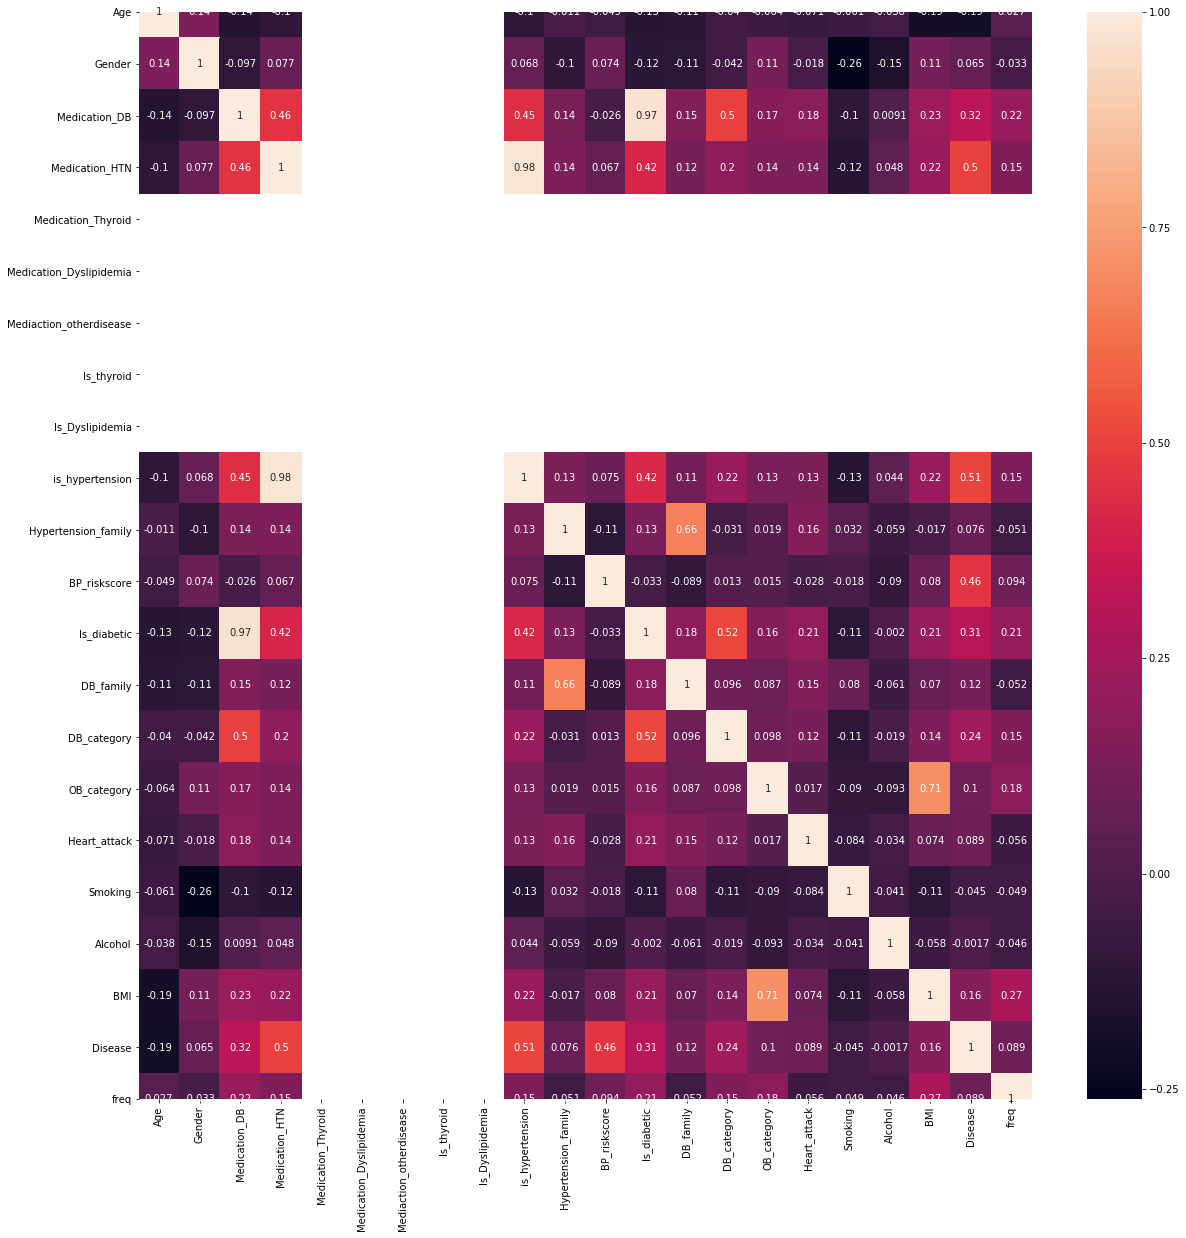

In [74]:
plt.figure(figsize=(20,20))
sns.heatmap(df_oldes.corr(),annot=True);

#### Less than 25

In [75]:
cols=df_screening.columns

In [76]:
df_screening[(df_screening["Age"] < 25) & (df_screening["Disease"] == 1)][['Age','Gender','Medication_DB','Medication_HTN','Medication_Thyroid','Medication_Dyslipidemia','Mediaction_otherdisease','DB_family','DB_category','OB_category','Heart_attack','Smoking','Alcohol','BMI']]

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI
80,4,1,0.0,0.0,0.0,0.0,0.0,0,0.0,2.0,0,0,0,27.65
1398,24,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,18.75
3396,23,1,NaN,NaN,NaN,NaN,NaN,0,0.0,2.0,0,0,0,27.80
3690,23,1,1.0,NaN,NaN,NaN,NaN,0,0.0,0.0,0,0,0,23.00
3725,19,1,NaN,NaN,1.0,NaN,NaN,0,0.0,1.0,0,0,1,15.60
3826,23,1,0.0,0.0,0.0,0.0,0.0,1,0.0,2.0,0,0,0,31.38
4094,22,1,NaN,NaN,1.0,NaN,NaN,0,0.0,0.0,0,0,1,22.70
4253,21,1,NaN,NaN,NaN,NaN,NaN,1,1.0,2.0,0,0,0,25.40
4403,20,1,NaN,NaN,NaN,NaN,NaN,0,0.0,2.0,0,0,0,26.60
4404,21,1,NaN,NaN,1.0,NaN,NaN,0,0.0,0.0,0,0,0,20.80


In [77]:
df_screening[(df_screening["Age"] < 25) & (df_screening["Disease"] == 1)].describe()

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,Hypertension_family,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
count,36.000000,36.000000,22.000000,23.000000,25.000000,21.0,21.0,34.000000,34.0,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.0,36.000000,36.000000,36.000000,36.0,36.000000
mean,21.944444,0.305556,0.136364,0.043478,0.120000,0.0,0.0,0.117647,0.0,0.027778,0.138889,0.361111,0.083333,0.222222,0.250000,1.555556,0.0,0.083333,0.194444,26.071389,1.0,0.805556
std,3.397011,0.467177,0.351250,0.208514,0.331662,0.0,0.0,0.327035,0.0,0.166667,0.350736,0.542627,0.280306,0.421637,0.603561,0.734631,0.0,0.280306,0.401386,4.420858,0.0,1.909666
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,15.600000,1.0,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,23.860000,1.0,0.000000
50%,23.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,0.000000,0.000000,26.690000,1.0,0.000000
75%,24.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.0,0.000000,0.000000,28.577500,1.0,0.000000
max,24.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,2.000000,0.0,1.000000,1.000000,33.520000,1.0,8.000000


#### > 24  < 45

In [78]:
df_middle_age=df_screening[(df_screening["Age"] >= 25) & (df_screening["Age"] <= 45)]
df_middle_age

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,other_diseases,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,...,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
0,39,1,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0.0,0,0,0,19.25,0.0,0
1,34,1,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0.0,0,0,0,18.86,0.0,0
3,39,1,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,...,0.0,0,0,1.0,0.0,0,0,0,19.91,0.0,0
4,34,1,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0.0,0,0,0,21.57,0.0,0
5,34,1,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,...,0.0,0,0,1.0,2.0,0,0,0,29.62,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,29,0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,...,0.0,0,1,0.0,2.0,0,1,0,25.31,0.0,0
9990,29,0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,...,0.0,0,1,0.0,0.0,0,0,0,18.77,0.0,0
9992,30,0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,...,2.0,0,0,1.0,2.0,0,1,0,30.60,1.0,0
9993,44,0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,...,0.0,0,1,0.0,0.0,0,0,0,22.79,0.0,0


In [79]:
df_middle_age.shape[0]/df_screening.shape[0]*100

56.46129225845169

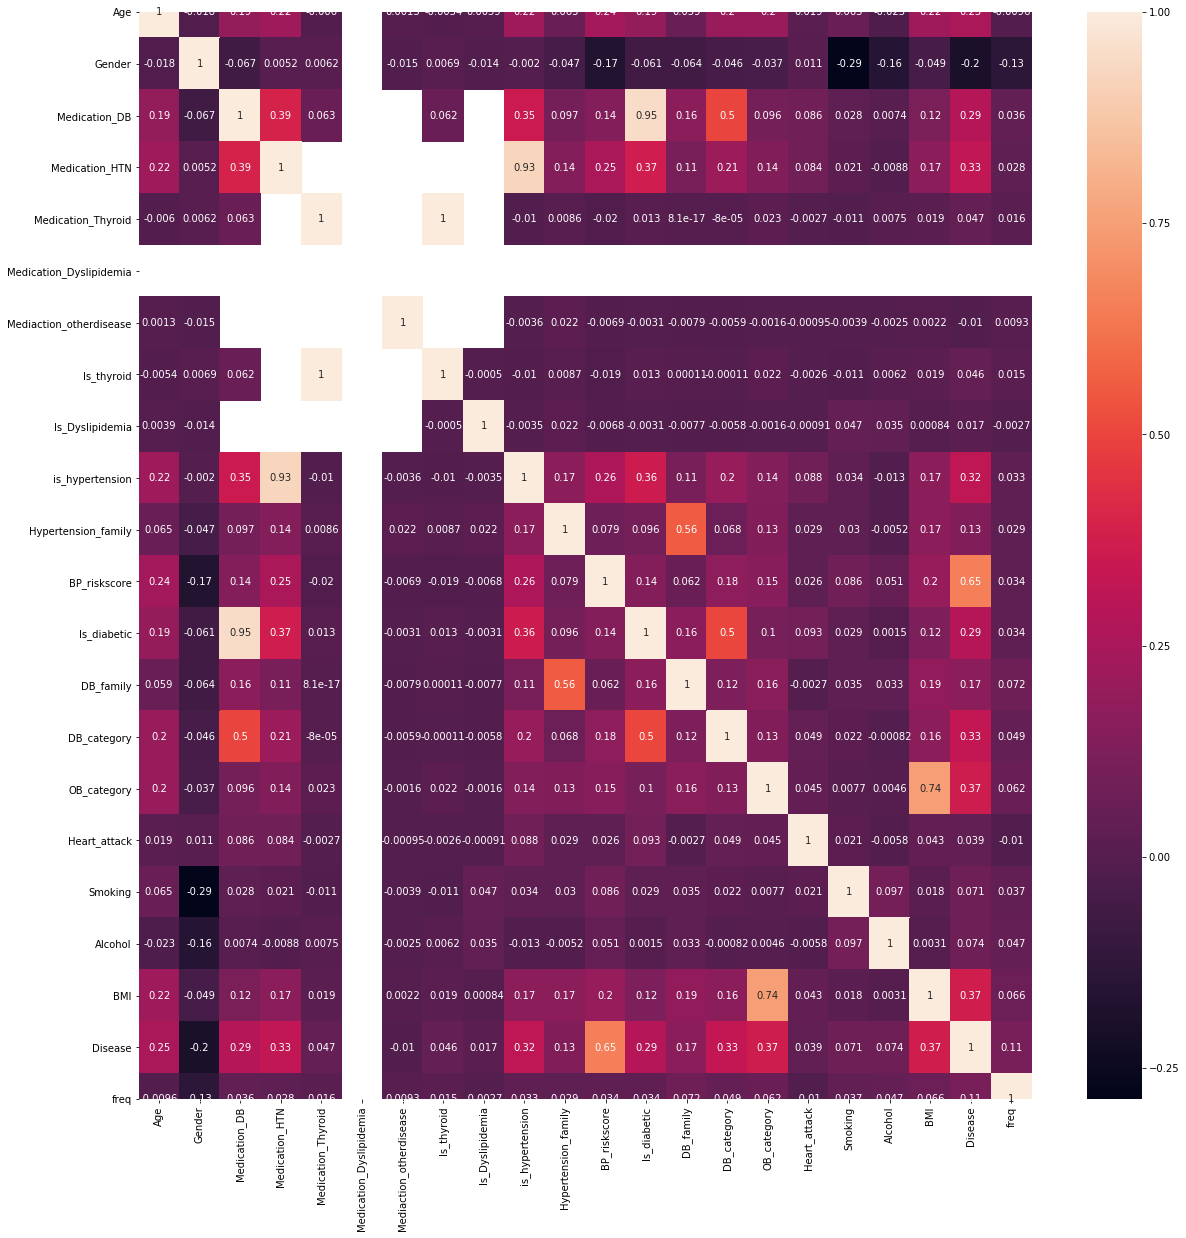

In [80]:
plt.figure(figsize=(20,20))
sns.heatmap(df_middle_age.corr(),annot=True);

In [81]:
df_middle_age.describe()

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,Hypertension_family,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
count,5645.000000,5645.000000,5410.000000,5439.000000,5408.000000,5401.0,5405.000000,5615.000000,5615.000000,5645.000000,5645.000000,5645.000000,5645.000000,5645.000000,5631.000000,5645.000000,5645.000000,5645.000000,5645.000000,5645.000000,5642.000000,5645.000000
mean,35.389903,0.531975,0.046580,0.059202,0.001479,0.0,0.000185,0.001425,0.000178,0.065722,0.271568,0.331444,0.049779,0.248184,0.251820,1.107529,0.004606,0.074048,0.068911,24.171164,0.375576,0.457750
std,5.456854,0.499021,0.210758,0.236024,0.038437,0.0,0.013602,0.037722,0.013345,0.247817,0.444808,0.651399,0.217506,0.431998,0.582595,0.888916,0.067716,0.261872,0.355725,5.206567,0.484314,2.261406
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.650000,0.000000,0.000000
50%,35.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,23.800000,0.000000,0.000000
75%,40.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,27.080000,1.000000,0.000000
max,45.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,8.000000,75.350000,1.000000,36.000000


In [82]:
df_middle_age["OB_category"].value_counts()

2.0    2074
0.0    1795
1.0    1612
3.0     164
Name: OB_category, dtype: int64

In [83]:
2200/5645

0.38972542072630645

### >45 <75

In [84]:
df_early_old_age=df_screening[(df_screening["Age"] > 45 ) & (df_screening["Age"] < 75)]
df_early_old_age

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,other_diseases,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,...,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
2,74,1,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0.0,0,0,0,18.83,1.0,0
6,58,1,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,...,2.0,0,0,1.0,2.0,0,0,0,27.90,1.0,0
7,46,1,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,...,0.0,0,0,0.0,2.0,0,0,0,29.49,0.0,0
12,62,1,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,...,0.0,0,1,0.0,3.0,0,0,0,44.31,1.0,0
15,63,1,0.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,1,...,0.0,0,0,1.0,2.0,0,0,0,28.18,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,52,0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,...,0.0,0,1,0.0,0.0,0,1,0,20.54,0.0,0
9995,64,0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,...,2.0,0,0,0.0,2.0,0,0,0,26.78,1.0,0
9996,59,0,0.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,1,...,2.0,0,0,1.0,1.0,0,0,0,24.58,1.0,0
9997,69,0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,1,...,1.0,1,1,1.0,2.0,0,0,0,27.49,1.0,0


In [85]:
df_early_old_age.shape[0]/df_screening.shape[0]*100

39.32786557311462

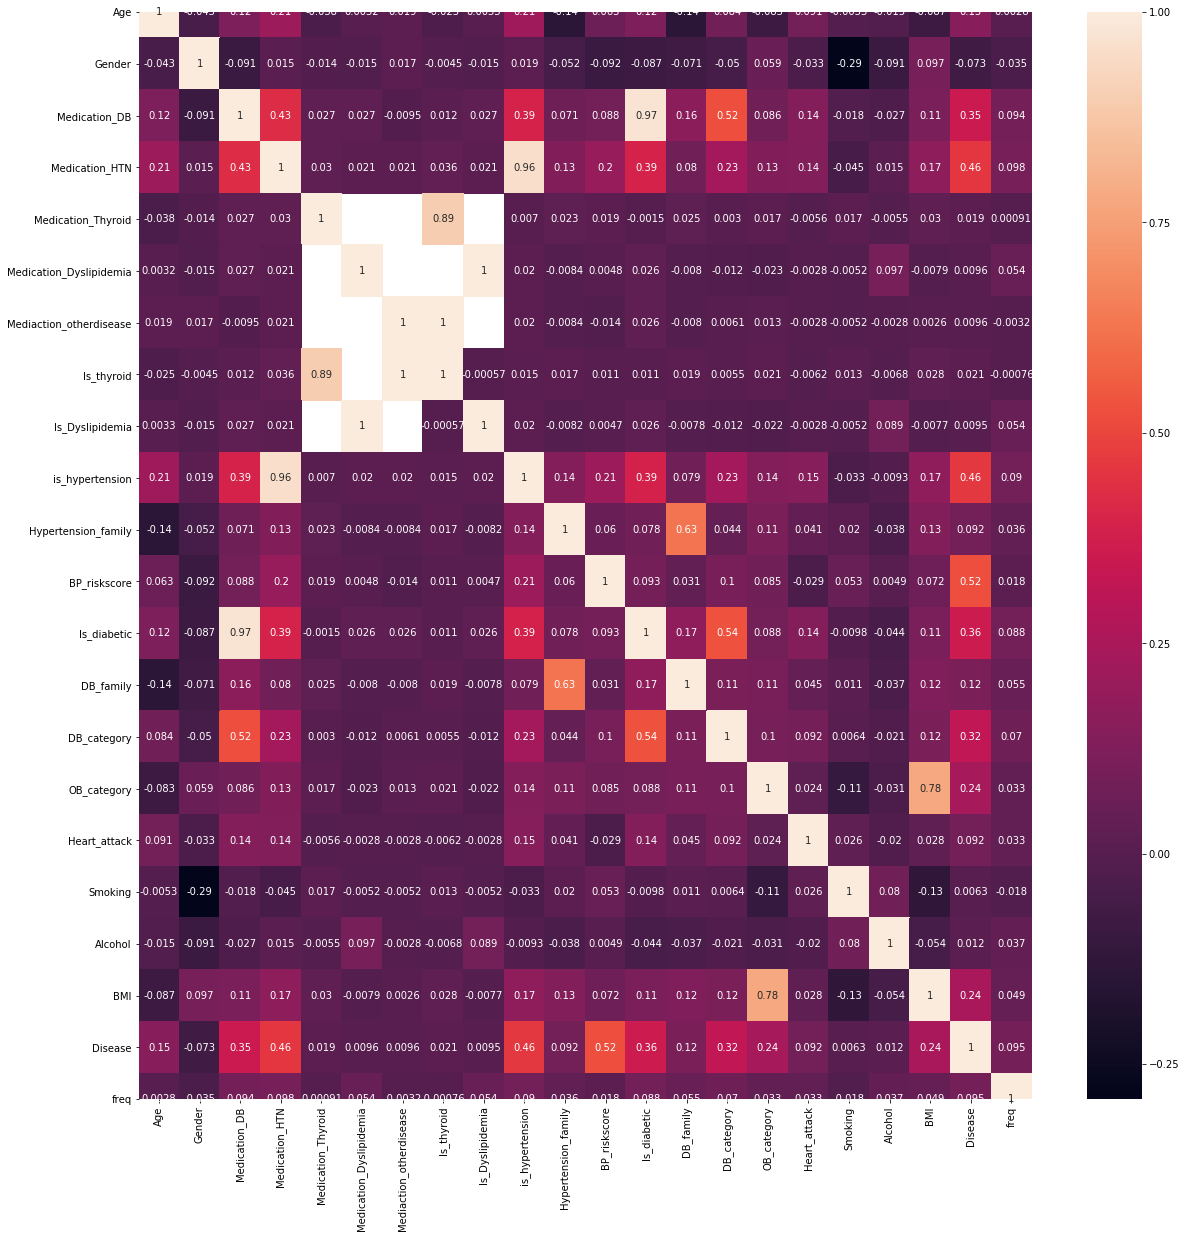

In [86]:
plt.figure(figsize=(20,20))
sns.heatmap(df_early_old_age.corr(),annot=True);

In [87]:
df_early_old_age.describe()

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,Hypertension_family,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
count,3932.000000,3932.000000,3853.000000,3875.000000,3840.000000,3836.000000,3837.000000,3926.000000,3926.000000,3932.000000,3932.000000,3932.000000,3932.000000,3932.000000,3923.000000,3932.000000,3932.000000,3932.000000,3932.000000,3932.000000,3922.000000,3932.000000
mean,57.330621,0.463886,0.262393,0.378065,0.001042,0.000261,0.000261,0.001274,0.000255,0.393947,0.209563,0.749491,0.269329,0.194303,0.665052,1.277976,0.028993,0.095371,0.066633,25.319789,0.740184,0.447864
std,8.107836,0.498758,0.439992,0.484966,0.032262,0.016146,0.016144,0.035669,0.015960,0.488686,0.407048,0.848817,0.443667,0.395714,0.888174,0.908589,0.167808,0.293764,0.346712,5.340318,0.438590,2.245225
min,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.710000,0.000000,0.000000
50%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,24.990000,1.000000,0.000000
75%,64.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,28.330000,1.000000,0.000000
max,74.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,5.000000,70.560000,1.000000,35.000000


In [88]:
df_early_old_age["Gender"].value_counts()

0    2108
1    1824
Name: Gender, dtype: int64

In [89]:
df_early_old_age["OB_category"].value_counts()

2.0    1781
0.0    1048
1.0     923
3.0     180
Name: OB_category, dtype: int64

In [90]:
2700/3932*100

68.66734486266532

In [91]:
df_early_old_age["OB_category"].value_counts()

2.0    1781
0.0    1048
1.0     923
3.0     180
Name: OB_category, dtype: int64

## Frequency analysis

In [92]:
print(df_screening[df_screening["freq"]>0].groupby(["Gender"])[["Gender"]].count())
print(df_screening[df_screening["freq"]>0].groupby(["Disease"])[["Disease"]].count())

        Gender
Gender        
0          571
1          209
         Disease
Disease         
0.0          204
1.0          567


In [93]:
df_screening["freq"].value_counts(bins=10)

(-0.037, 3.6]    9565
(3.6, 7.2]        243
(7.2, 10.8]        82
(10.8, 14.4]       51
(14.4, 18.0]       21
(21.6, 25.2]       13
(18.0, 21.6]       10
(28.8, 32.4]        7
(32.4, 36.0]        3
(25.2, 28.8]        3
Name: freq, dtype: int64

In [94]:
df_screening[(df_screening["freq"]>0) & (df_screening["Disease"] == 0)].describe()

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,Hypertension_family,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
count,204.000000,204.000000,179.0,180.0,179.0,179.0,181.000000,203.0,203.0,204.0,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.0,204.000000,204.000000,204.000000,204.0,204.000000
mean,33.122549,0.181373,0.0,0.0,0.0,0.0,0.005525,0.0,0.0,0.0,0.225490,0.009804,0.004902,0.289216,0.127451,0.593137,0.0,0.063725,0.122549,22.421471,0.0,5.254902
std,7.559269,0.386274,0.0,0.0,0.0,0.0,0.074329,0.0,0.0,0.0,0.418933,0.098771,0.070014,0.454514,0.334298,0.600617,0.0,0.244864,0.627515,2.626341,0.0,5.577376
min,22.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,15.450000,0.0,1.000000
25%,28.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,20.865000,0.0,2.000000
50%,31.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,22.705000,0.0,3.000000
75%,37.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,24.177500,0.0,5.000000
max,74.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.0,1.000000,8.000000,34.490000,0.0,34.000000


In [95]:
df_screening[(df_screening["freq"]>0) & (df_screening["Disease"] == 1)].describe()

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,Hypertension_family,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
count,567.000000,567.000000,525.000000,526.000000,516.000000,514.000000,515.0,566.000000,566.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.0,567.000000
mean,47.943563,0.299824,0.390476,0.406844,0.005814,0.001946,0.0,0.005300,0.001767,0.395062,0.324515,0.791887,0.379189,0.386243,0.894180,1.587302,0.031746,0.114638,0.111111,27.169929,1.0,5.938272
std,13.626530,0.458585,0.488322,0.491713,0.076101,0.044108,0.0,0.072675,0.042033,0.489296,0.468607,0.829495,0.485614,0.487317,1.017211,0.831607,0.175478,0.318866,0.389799,4.593838,0.0,5.760049
min,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.600000,1.0,1.000000
25%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,24.205000,1.0,2.000000
50%,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,26.500000,1.0,4.000000
75%,58.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,29.565000,1.0,8.000000
max,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,4.000000,46.500000,1.0,36.000000


In [96]:
print(df_screening[df_screening["freq"]>3].groupby(["Gender"])[["Gender"]].count())
print(df_screening[df_screening["freq"]>3].groupby(["Disease"])[["Disease"]].count())
df_screening[df_screening["freq"]>3].describe()

        Gender
Gender        
0          315
1          118
         Disease
Disease         
0.0           95
1.0          331


,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,Hypertension_family,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
count,433.000000,433.000000,414.000000,413.000000,407.000000,407.000000,406.0,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,426.000000,433.000000
mean,44.870670,0.272517,0.248792,0.312349,0.002457,0.002457,0.0,0.002309,0.002309,0.307159,0.314088,0.612009,0.247113,0.371824,0.607390,1.441109,0.020785,0.110855,0.133949,26.460531,0.776995,8.896074
std,13.872164,0.445770,0.432836,0.464013,0.049568,0.049568,0.0,0.048057,0.048057,0.461850,0.464688,0.797591,0.431832,0.483851,0.870367,0.848130,0.142830,0.314315,0.549054,4.551717,0.416751,6.077494
min,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.450000,0.000000,4.000000
25%,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,23.410000,1.000000,5.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,25.770000,1.000000,7.000000
75%,54.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,28.760000,1.000000,10.000000
max,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,8.000000,46.500000,1.000000,36.000000


In [97]:
df_screening[(df_screening["freq"]>3) & (df_screening["freq"] < 10)].describe()

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,Hypertension_family,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
count,301.000000,301.000000,287.000000,285.000000,281.000000,281.000000,280.0,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,298.000000,301.000000
mean,44.770764,0.259136,0.268293,0.294737,0.003559,0.003559,0.0,0.003322,0.003322,0.285714,0.312292,0.601329,0.269103,0.375415,0.621262,1.408638,0.019934,0.116279,0.122924,26.330897,0.775168,5.764120
std,13.959845,0.438890,0.443845,0.456726,0.059655,0.059655,0.0,0.057639,0.057639,0.452506,0.464200,0.791958,0.444232,0.485036,0.884730,0.876998,0.140005,0.321093,0.595684,4.532509,0.418174,1.645451
min,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.450000,0.000000,4.000000
25%,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,23.130000,1.000000,4.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,25.800000,1.000000,5.000000
75%,53.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,28.830000,1.000000,7.000000
max,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,8.000000,41.570000,1.000000,9.000000


In [98]:
print(df_screening[df_screening["freq"]>10].groupby(["Gender"])[["Gender"]].count())
print(df_screening[df_screening["freq"]>10].groupby(["Disease"])[["Disease"]].count())

        Gender
Gender        
0           81
1           27
         Disease
Disease         
0.0           27
1.0           78


In [99]:
df_screening[(df_screening["freq"]>10)].describe()

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,Hypertension_family,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
count,108.000000,108.000000,104.000000,104.000000,103.0,103.0,103.0,108.0,108.0,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,105.000000,108.000000
mean,43.203704,0.250000,0.182692,0.288462,0.0,0.0,0.0,0.0,0.0,0.296296,0.351852,0.574074,0.175926,0.388889,0.574074,1.481481,0.027778,0.111111,0.185185,26.302315,0.742857,17.379630
std,12.773190,0.435031,0.388285,0.455241,0.0,0.0,0.0,0.0,0.0,0.458752,0.479774,0.787801,0.382532,0.489771,0.845037,0.729633,0.165102,0.315735,0.456483,4.325917,0.439155,6.404901
min,25.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.980000,0.000000,11.000000
25%,34.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,23.812500,0.000000,12.750000
50%,40.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,25.470000,1.000000,15.000000
75%,52.500000,0.250000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,28.407500,1.000000,21.000000
max,75.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,2.000000,46.500000,1.000000,36.000000


In [100]:
df_screening[(df_screening["freq"]>10) & (df_screening["Disease"] == 1)].describe()

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,Hypertension_family,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
count,78.000000,78.000000,74.000000,74.000000,73.0,73.0,73.0,78.0,78.0,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.0,78.000000
mean,46.294872,0.282051,0.243243,0.378378,0.0,0.0,0.0,0.0,0.0,0.384615,0.371795,0.794872,0.230769,0.371795,0.743590,1.641026,0.025641,0.128205,0.256410,27.314487,1.0,17.371795
std,12.029303,0.452911,0.431969,0.488293,0.0,0.0,0.0,0.0,0.0,0.489653,0.486412,0.827435,0.424052,0.486412,0.917873,0.702026,0.159085,0.336482,0.520636,4.504571,0.0,6.611892
min,28.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.240000,1.0,11.000000
25%,37.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,24.580000,1.0,12.000000
50%,44.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,26.660000,1.0,14.000000
75%,58.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.750000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,29.030000,1.0,21.000000
max,75.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,2.000000,46.500000,1.0,36.000000


In [101]:
df_screening[(df_screening["freq"]>10) & (df_screening["Disease"] == 0)].describe()

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Mediaction_otherdisease,Is_thyroid,Is_Dyslipidemia,is_hypertension,Hypertension_family,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
count,27.000000,27.000000,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.000000,27.0,27.0,27.000000,27.000000,27.000000,27.0,27.000000,27.0,27.000000,27.0,27.000000
mean,32.629630,0.185185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.259259,0.0,0.0,0.444444,0.074074,1.000000,0.0,0.074074,0.0,23.515556,0.0,17.629630
std,7.913708,0.395847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.446576,0.0,0.0,0.506370,0.266880,0.620174,0.0,0.266880,0.0,2.366195,0.0,6.013754
min,25.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,17.980000,0.0,11.000000
25%,27.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.0,22.970000,0.0,13.000000
50%,30.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.0,23.940000,0.0,16.000000
75%,35.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,1.000000,0.000000,1.000000,0.0,0.000000,0.0,24.665000,0.0,18.500000
max,60.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,1.000000,2.000000,0.0,1.000000,0.0,27.320000,0.0,34.000000


## Imputations

In [102]:
df_screening.drop(["Mediaction_otherdisease","other_diseases"],axis=1,inplace=True)

In [103]:
idx=df_screening[df_screening["Disease"].isnull()].index
for i in idx:
    if (df_screening["Is_diabetic"].loc[i] == 1) | (df_screening["Is_thyroid"].loc[i] == 1) | (df_screening["Is_Dyslipidemia"].loc[i] == 1) | (df_screening["is_hypertension"].loc[i] == 1):
        df_screening["Disease"].loc[i] = 1

C:\Users\Vasu\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [104]:
#df_screening[(df_screening["Age"] > 45) & (df_screening["Is_diabetic"] == 1) & df_screening["Is_Dyslipidemia"].isnull() == True]

In [105]:
#idx=df_screening[(df_screening["Age"] > 45) & (df_screening["Is_diabetic"] == 1) & df_screening["Is_Dyslipidemia"].isnull() == True].index
#df_screening["Is_Dyslipidemia"].loc[idx] = 1
#df_screening["Is_Dyslipidemia"].fillna(0,inplace=True)

In [106]:
#df_screening["Is_Dyslipidemia"].value_counts()

In [107]:
'''import random
values=[0,1]
df_screening["Is_thyroid"].fillna(random.choice(values),inplace=True)'''

'import random\nvalues=[0,1]\ndf_screening["Is_thyroid"].fillna(random.choice(values),inplace=True)'

In [108]:
idx=df_screening[(df_screening["BP_riskscore"] > 1) & (df_screening["Age"] >= 45) & df_screening["Is_Dyslipidemia"].isnull()].index
df_screening["Is_Dyslipidemia"].loc[idx]=1
df_screening["Is_Dyslipidemia"].fillna(0,inplace=True)

In [109]:
def replace_null_values(df,med_col,dis_col):
    idx=df[df[med_col].isnull()].index
    for i in idx:
        if (df[dis_col].loc[i] == 1):
            df[med_col].loc[i]=1
        elif (df[dis_col].loc[i] == 0):
            df[med_col].loc[i]=0
    return df

In [110]:
replace_null_values(df_screening,"Medication_DB","Is_diabetic")
replace_null_values(df_screening,"Medication_HTN","is_hypertension")
replace_null_values(df_screening,"Medication_Thyroid","Is_thyroid")
replace_null_values(df_screening,"Medication_Dyslipidemia","Is_Dyslipidemia")

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,is_hypertension,Hypertension_family,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease,freq
0,39,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0,0,0,19.25,0.0,0
1,34,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0,0,0,18.86,0.0,0
2,74,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0,0,0,18.83,1.0,0
3,39,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,1.0,0.0,0,0,0,19.91,0.0,0
4,34,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0,0,0,21.57,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,64,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,0,0,0.0,2.0,0,0,0,26.78,1.0,0
9996,59,0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,2.0,0,0,1.0,1.0,0,0,0,24.58,1.0,0
9997,69,0,1.0,1.0,0.0,0.0,0.0,0.0,1,0,1.0,1,1,1.0,2.0,0,0,0,27.49,1.0,0
9998,50,0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.0,0,1,0.0,2.0,0,0,0,26.44,1.0,0


In [111]:
'''idx=df_screening[df_screening["Medication_HTN"].isnull()].index
df_screening["Medication_HTN"].loc[idx]=np.where(df_screening["is_hypertension"].loc[idx] == 1,1,0)'''

'idx=df_screening[df_screening["Medication_HTN"].isnull()].index\ndf_screening["Medication_HTN"].loc[idx]=np.where(df_screening["is_hypertension"].loc[idx] == 1,1,0)'

In [112]:
df_screening.isnull().sum()

Age                         0
Gender                      0
Medication_DB               0
Medication_HTN              0
Medication_Thyroid         42
Medication_Dyslipidemia     0
Is_thyroid                 42
Is_Dyslipidemia             0
is_hypertension             0
Hypertension_family         0
BP_riskscore                0
Is_diabetic                 0
DB_family                   0
DB_category                23
OB_category                 0
Heart_attack                0
Smoking                     0
Alcohol                     0
BMI                         0
Disease                     0
freq                        0
dtype: int64

In [113]:
cols=df_screening.columns

In [114]:
from sklearn.experimental import enable_iterative_imputer  #IterativeImputer
from sklearn.impute import IterativeImputer 

imp = IterativeImputer(missing_values=np.nan, sample_posterior=False, 
                                 max_iter=10, tol=0.001, 
                                 n_nearest_features=4, initial_strategy='most_frequent') 
df_screening=imp.fit_transform(df_screening)
df_screening=pd.DataFrame(df_screening,columns=cols)